# D209 Data Mining I : Classification 

In [1]:
#iport packages
import pandas as pd # python library for data manipulation, structure, and analysis
import numpy as np # python library for numeric computations using arrays
from numpy import array

import matplotlib.pyplot as plt #python library for data visualizations

# specific command for running matplotlib within the jupyter notebook kernel
%matplotlib inline

#set the parameters for figure sizes 
print("Before, figure default size is: ", plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (10, 10)
print("After, figure default size is: ", plt.rcParams["figure.figsize"])

import seaborn as sns #python library also used for data visualization and EDA 

from sklearn import preprocessing # module developed for transforming, standardizing, scaling data
from sklearn.preprocessing import scale, MinMaxScaler # transformer used for scaling features, range 0-1

from sklearn.feature_selection import SelectKBest,chi2 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline



Before, figure default size is:  [6.0, 4.0]
After, figure default size is:  [10.0, 10.0]


In [2]:
df = pd.read_csv('churn_clean.csv')
df.head().T

,0,1,2,3,4
CaseOrder,1,2,3,4,5
Customer_id,K409198,S120509,K191035,D90850,K662701
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,344d114c-3736-4be5-98f7-c72c281e2d35,abfa2b40-2d43-4994-b15a-989b8c79e311,68a861fd-0d20-4e51-a587-8a90407ee574
UID,e885b299883d4f9fb18e39c75155d990,f2de8bef964785f41a2959829830fb8a,f1784cfa9f6d92ae816197eb175d3c71,dc8a365077241bb5cd5ccd305136b05e,aabb64a116e83fdc4befc1fbab1663f9
City,Point Baker,West Branch,Yamhill,Del Mar,Needville
State,AK,MI,OR,CA,TX
County,Prince of Wales-Hyder,Ogemaw,Yamhill,San Diego,Fort Bend
Zip,99927,48661,97148,92014,77461
Lat,56.251,44.32893,45.35589,32.96687,29.38012
Lng,-133.37571,-84.2408,-123.24657,-117.24798,-95.80673


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CaseOrder,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Zip,10000.0,49153.319600,27532.196108,601.000000,26292.500000,48869.500000,71866.500000,99929.000000
Lat,10000.0,38.757567,5.437389,17.966120,35.341828,39.395800,42.106908,70.640660
Lng,10000.0,-90.782536,15.156142,-171.688150,-97.082812,-87.918800,-80.088745,-65.667850
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.000000
Children,10000.0,2.087700,2.147200,0.000000,0.000000,1.000000,3.000000,10.000000
Age,10000.0,53.078400,20.698882,18.000000,35.000000,53.000000,71.000000,89.000000
Income,10000.0,39806.926771,28199.916702,348.670000,19224.717500,33170.605000,53246.170000,258900.700000
Outage_sec_perweek,10000.0,10.001848,2.976019,0.099747,8.018214,10.018560,11.969485,21.207230
Email,10000.0,12.016000,3.025898,1.000000,10.000000,12.000000,14.000000,23.000000


In [4]:
df.shape

(10000, 50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
#rename columns 

In [7]:
prep_df = df.rename(columns={'CaseOrder': 'case_order',
                'Customer_id': 'customer_id',
               'Interaction': 'interaction',
               'UID': 'uid',
               'City': 'city',
               'State': 'state',
               'County':'county',
               'Zip': 'zip',
               'Lat': 'latitude',
               'Lng': 'longitude',
               'Population': 'population',
               'Area': 'area',
               'TimeZone': 'time_zone',
               'Job': 'job',
               'Children': 'children',
               'Age': 'age',
               'Income': 'income',
               'Marital': 'marital_status',
               'Gender': 'gender',
               'Churn': 'churn',
               'Outage_sec_perweek': 'outage_sec_perweek',
               'Email': 'email_correspondence',
               'Contacts': 'support_contacts',
               'Yearly_equip_failure': 'equip_fail_year',
               'Techie': 'techie',
               'Contract': 'contract',
               'Port_modem': 'port_modem',
               'Tablet': 'tablet',
               'InternetService': 'internet_service',
               'Phone': 'phone_service',
               'Multiple': 'multi_lines',
               'OnlineSecurity': 'online_security',
               'OnlineBackup': 'online_backup',
               'DeviceProtection': 'device_protection',
               'TechSupport': 'tech_support',
               'StreamingTV': 'streaming_tv',
               'StreamingMovies': 'streaming_movies',
                'PaperlessBilling': 'paperless_billing',
               'PaymentMethod': 'payment_method',
               'Tenure': 'tenure',
               'MonthlyCharge':'monthly_charge',
               'Bandwidth_GB_Year': 'bandwidth_gb',
               'Item1': 'timely_response',
               'Item2': 'timely_fixes',
               'Item3': 'timely_replacements',
               'Item4': 'reliability',
               'Item5': 'options',
               'Item6': 'respectful_response',
               'Item7': 'courteous_exchange',
               'Item8': 'active_listening'})

In [8]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   case_order            10000 non-null  int64  
 1   customer_id           10000 non-null  object 
 2   interaction           10000 non-null  object 
 3   uid                   10000 non-null  object 
 4   city                  10000 non-null  object 
 5   state                 10000 non-null  object 
 6   county                10000 non-null  object 
 7   zip                   10000 non-null  int64  
 8   latitude              10000 non-null  float64
 9   longitude             10000 non-null  float64
 10  population            10000 non-null  int64  
 11  area                  10000 non-null  object 
 12  time_zone             10000 non-null  object 
 13  job                   10000 non-null  object 
 14  children              10000 non-null  int64  
 15  age                 

In [9]:
#assess for duplicated values

In [10]:
prep_df.duplicated().any()

False

In [11]:
#remove extraneous columns not planned for use in analysis 

In [12]:
prep_df = prep_df.drop(columns = ['uid','interaction','customer_id','city','state','county','zip','latitude',
                                 'longitude','population','area','time_zone','job','children','age','income',
                                 'marital_status','gender','techie','tenure'])
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   case_order            10000 non-null  int64  
 1   churn                 10000 non-null  object 
 2   outage_sec_perweek    10000 non-null  float64
 3   email_correspondence  10000 non-null  int64  
 4   support_contacts      10000 non-null  int64  
 5   equip_fail_year       10000 non-null  int64  
 6   contract              10000 non-null  object 
 7   port_modem            10000 non-null  object 
 8   tablet                10000 non-null  object 
 9   internet_service      10000 non-null  object 
 10  phone_service         10000 non-null  object 
 11  multi_lines           10000 non-null  object 
 12  online_security       10000 non-null  object 
 13  online_backup         10000 non-null  object 
 14  device_protection     10000 non-null  object 
 15  tech_support        

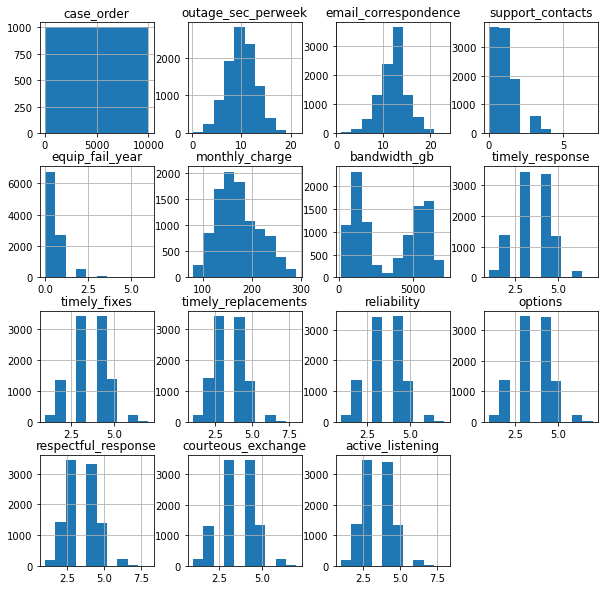

In [13]:
prep_df.hist();

In [14]:
#visualize relationships and patterns - EDA

In [15]:
prep_df['outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: outage_sec_perweek, dtype: float64

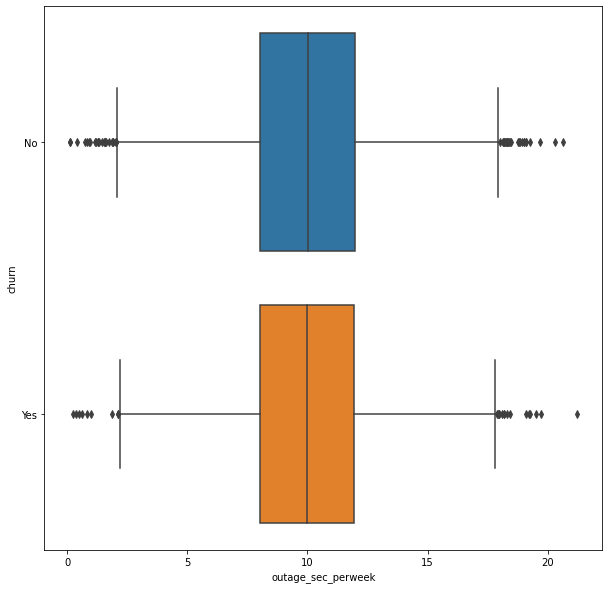

In [16]:
sns.boxplot(x='outage_sec_perweek',y='churn', data=prep_df);

In [17]:
prep_df['email_correspondence'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: email_correspondence, dtype: float64

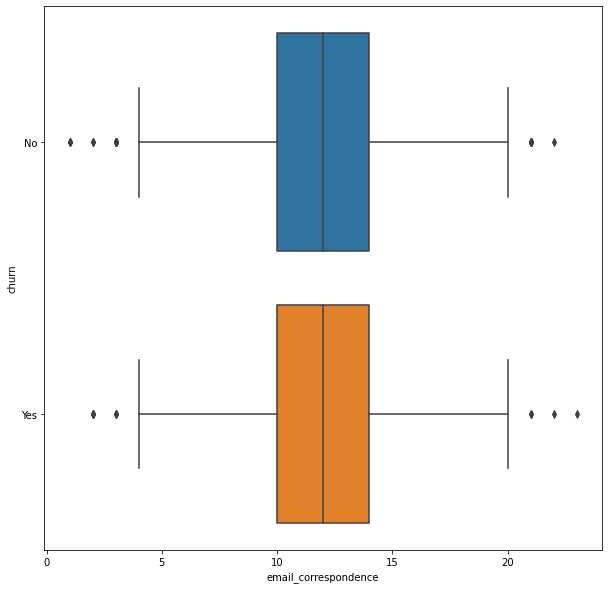

In [18]:
sns.boxplot(x='email_correspondence',y='churn',data=prep_df);

In [19]:
prep_df['support_contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: support_contacts, dtype: float64

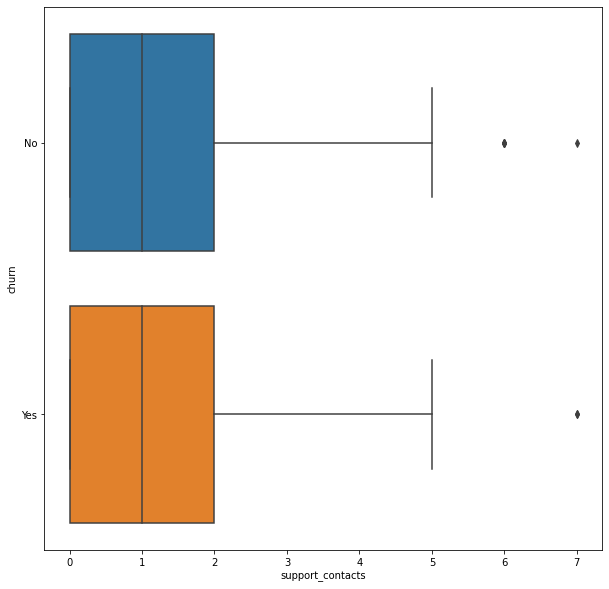

In [20]:
sns.boxplot(x='support_contacts',y='churn',data=prep_df);

In [21]:
prep_df['contract'].describe()

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: contract, dtype: object

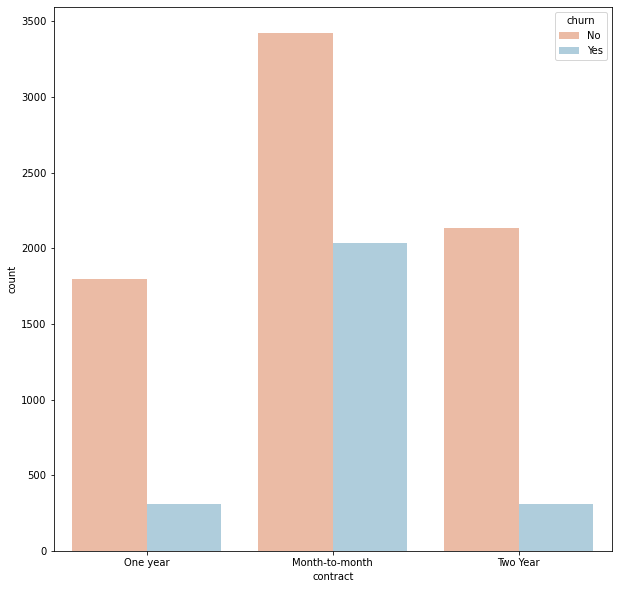

In [22]:
sns.countplot(x='contract',hue='churn',data=prep_df, palette='RdBu');

In [23]:
prep_df['equip_fail_year'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: equip_fail_year, dtype: float64

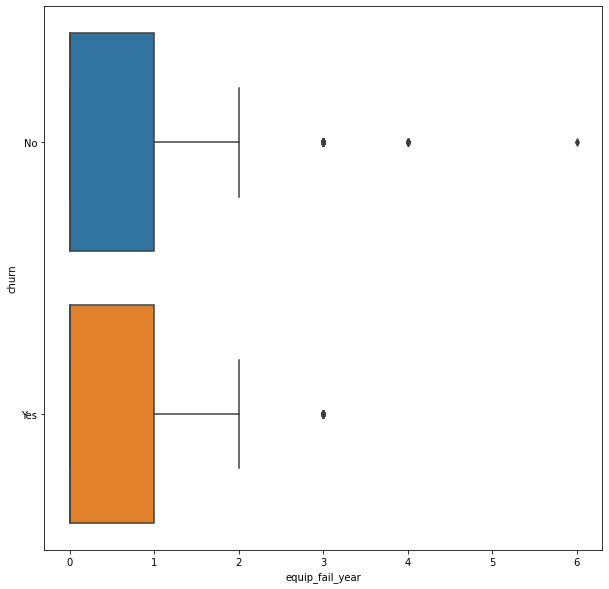

In [24]:
sns.boxplot(x='equip_fail_year', y='churn', data=prep_df);

In [25]:
prep_df['monthly_charge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: monthly_charge, dtype: float64

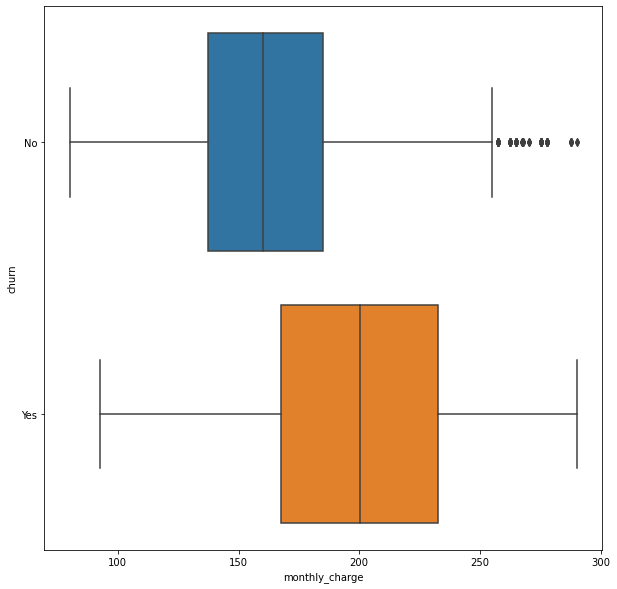

In [26]:
sns.boxplot(x='monthly_charge', y='churn', data=prep_df);

In [27]:
prep_df['reliability'].describe()

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: reliability, dtype: float64

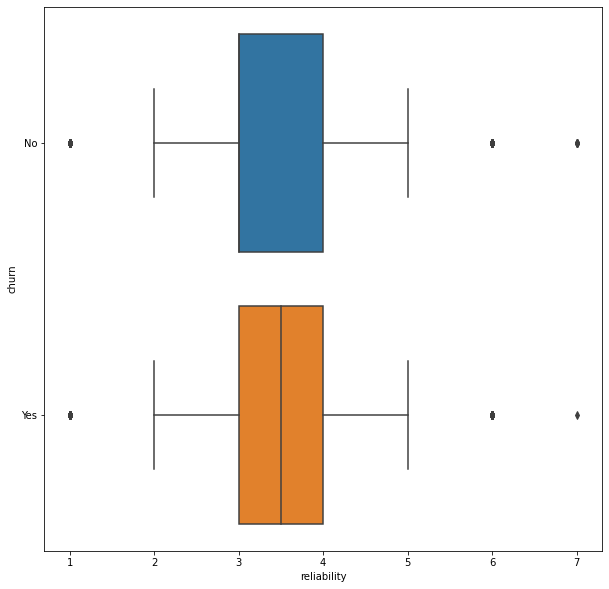

In [28]:
sns.boxplot(x='reliability', y='churn', data=prep_df);

In [29]:
prep_df['timely_fixes'].describe()

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: timely_fixes, dtype: float64

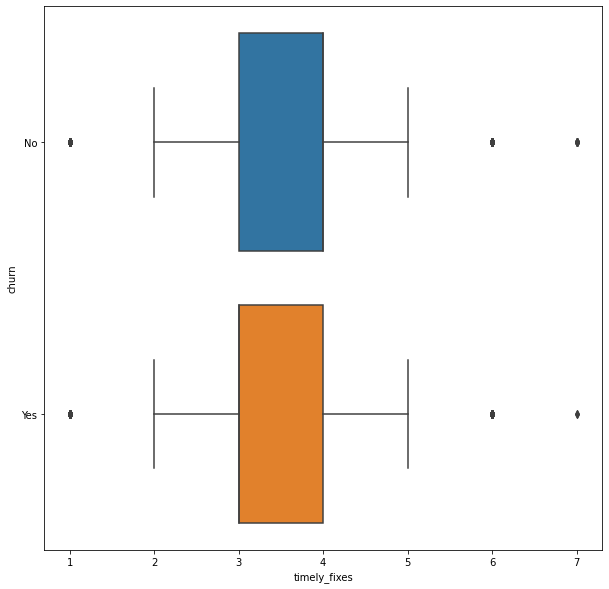

In [30]:
sns.boxplot(x='timely_fixes', y='churn', data=prep_df);

In [31]:
prep_df['timely_response'].describe()

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: timely_response, dtype: float64

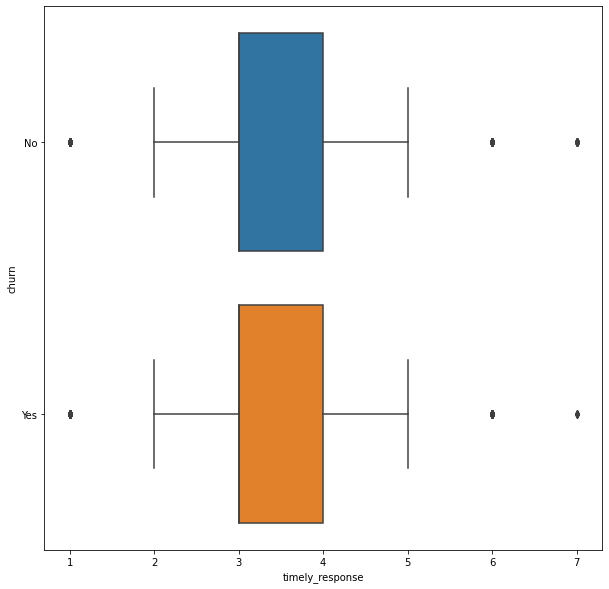

In [32]:
sns.boxplot(x='timely_response',y='churn', data=prep_df);

In [33]:
prep_df['timely_replacements'].describe()

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: timely_replacements, dtype: float64

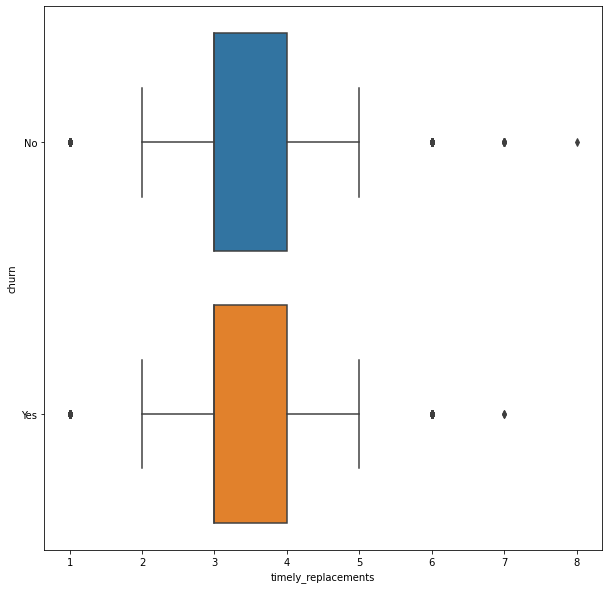

In [34]:
sns.boxplot(x='timely_replacements',y='churn',data=prep_df);

In [35]:
prep_df['options'].describe()

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: options, dtype: float64

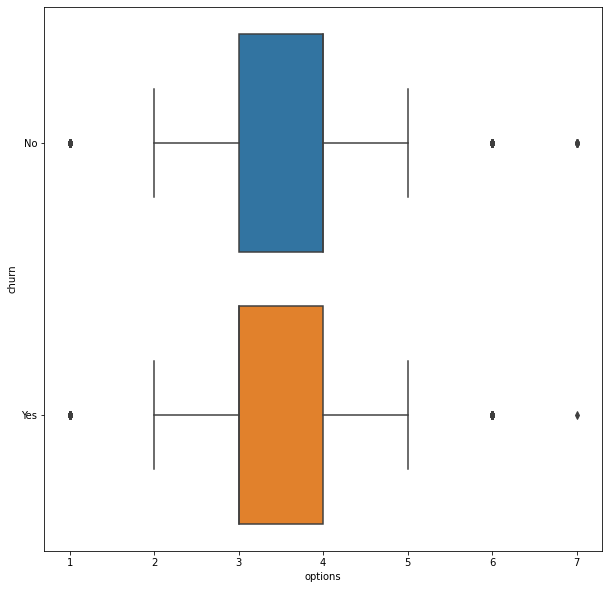

In [36]:
sns.boxplot(x='options',y='churn', data=prep_df);

In [37]:
prep_df['active_listening'].describe()

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: active_listening, dtype: float64

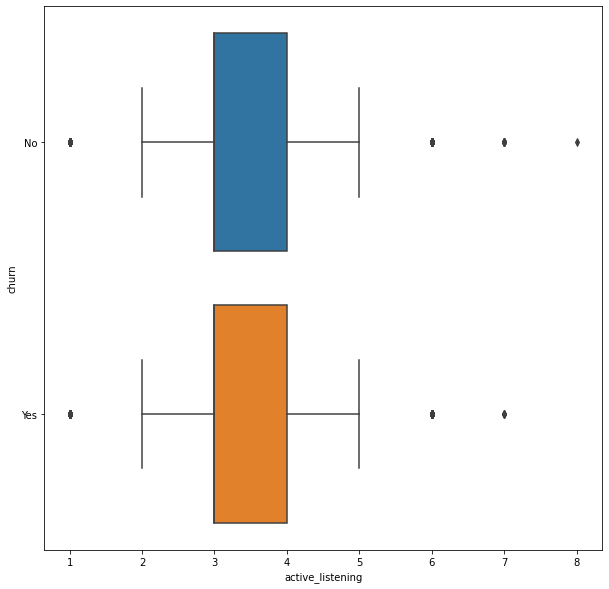

In [38]:
sns.boxplot(x='active_listening', y='churn', data=prep_df);

In [39]:
prep_df['courteous_exchange'].describe()

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: courteous_exchange, dtype: float64

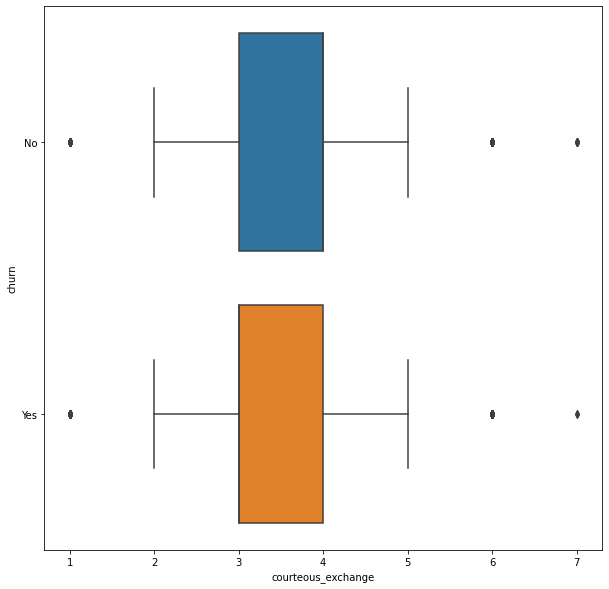

In [40]:
sns.boxplot(x='courteous_exchange', y='churn', data=prep_df);

In [41]:
prep_df['respectful_response'].describe()

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: respectful_response, dtype: float64

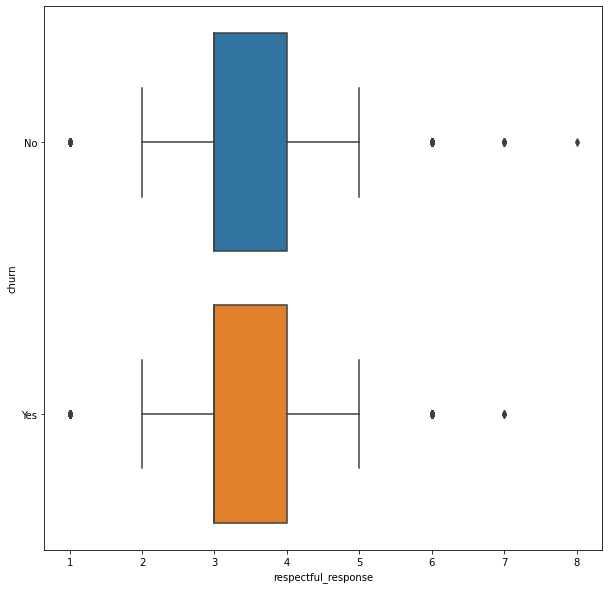

In [42]:
sns.boxplot(x='respectful_response', y='churn',data=prep_df);

In [43]:
prep_df['port_modem'].describe()

count     10000
unique        2
top          No
freq       5166
Name: port_modem, dtype: object

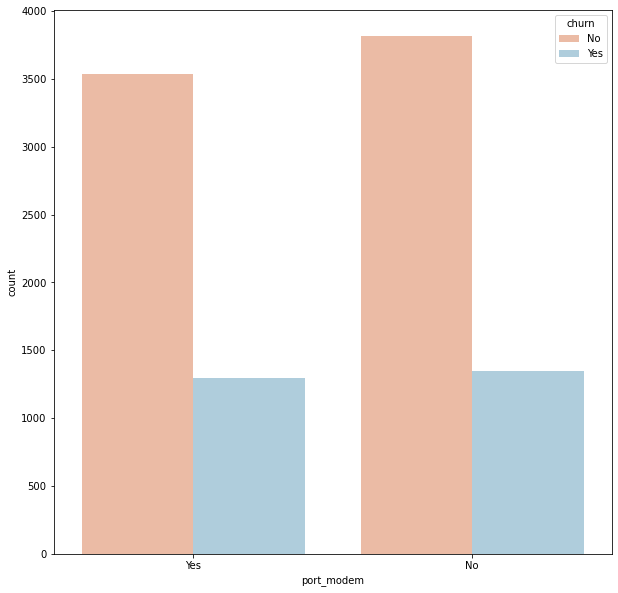

In [44]:
sns.countplot(x='port_modem', hue='churn', data=prep_df, palette='RdBu');

In [45]:
prep_df['tablet'].describe()

count     10000
unique        2
top          No
freq       7009
Name: tablet, dtype: object

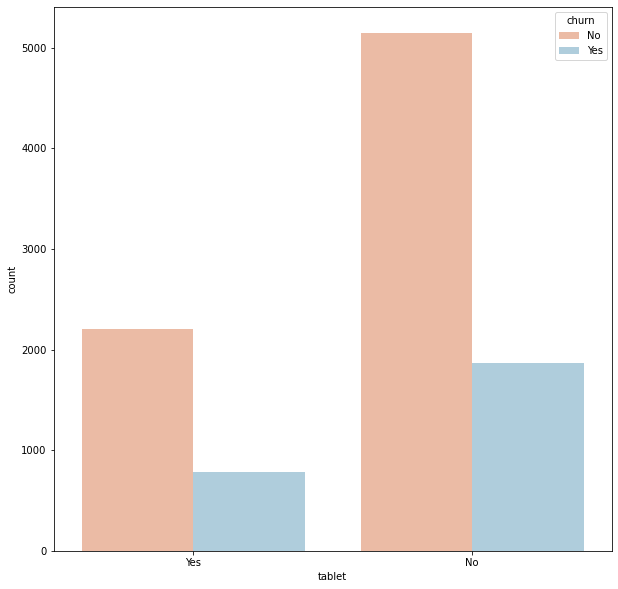

In [46]:
sns.countplot(x='tablet', hue='churn',data=prep_df, palette='RdBu');

In [47]:
prep_df['internet_service'].describe()

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: internet_service, dtype: object

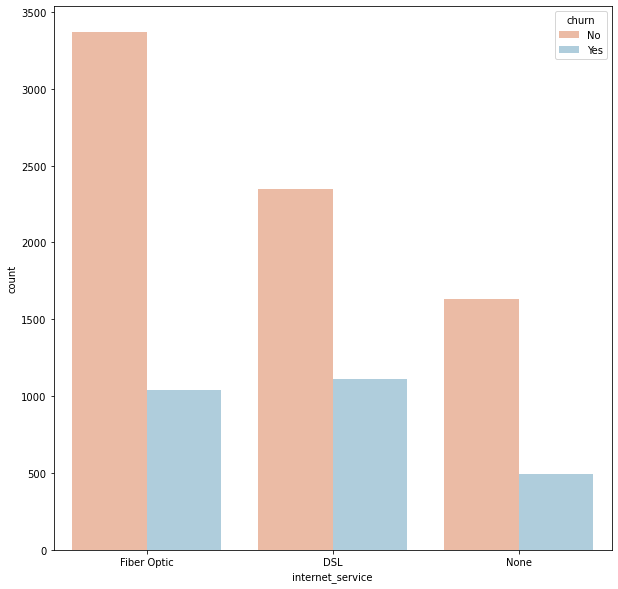

In [48]:
sns.countplot(x='internet_service',hue='churn',data=prep_df, palette='RdBu');

In [49]:
prep_df['phone_service'].describe()

count     10000
unique        2
top         Yes
freq       9067
Name: phone_service, dtype: object

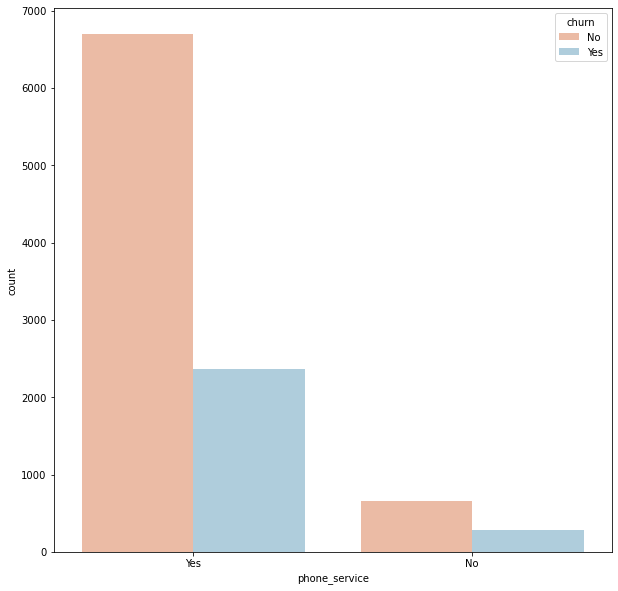

In [50]:
sns.countplot(x='phone_service',hue='churn',data=prep_df, palette='RdBu');

In [51]:
prep_df['multi_lines'].describe()

count     10000
unique        2
top          No
freq       5392
Name: multi_lines, dtype: object

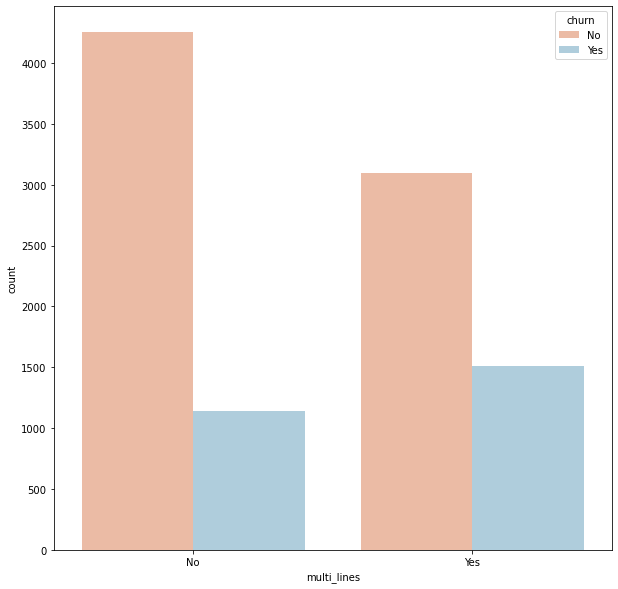

In [52]:
sns.countplot(x='multi_lines',hue='churn',data=prep_df, palette='RdBu');

In [53]:
prep_df['payment_method'].describe()

count                10000
unique                   4
top       Electronic Check
freq                  3398
Name: payment_method, dtype: object

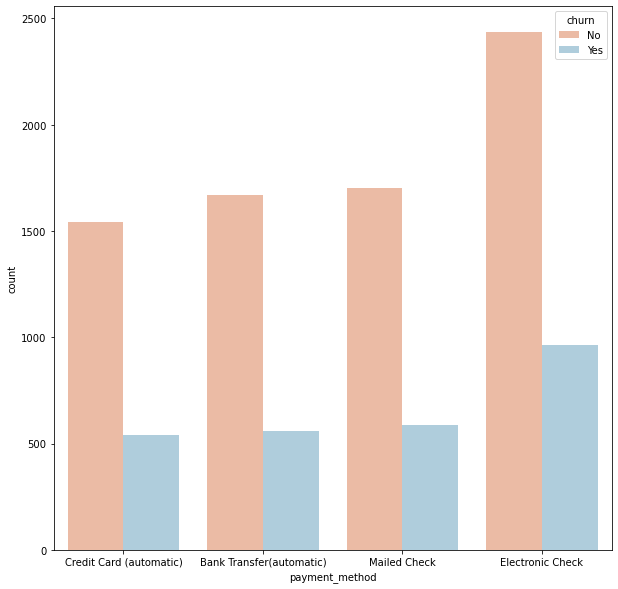

In [54]:
sns.countplot(x='payment_method', hue='churn',data=prep_df,palette='RdBu');

In [55]:
prep_df['online_security'].describe()

count     10000
unique        2
top          No
freq       6424
Name: online_security, dtype: object

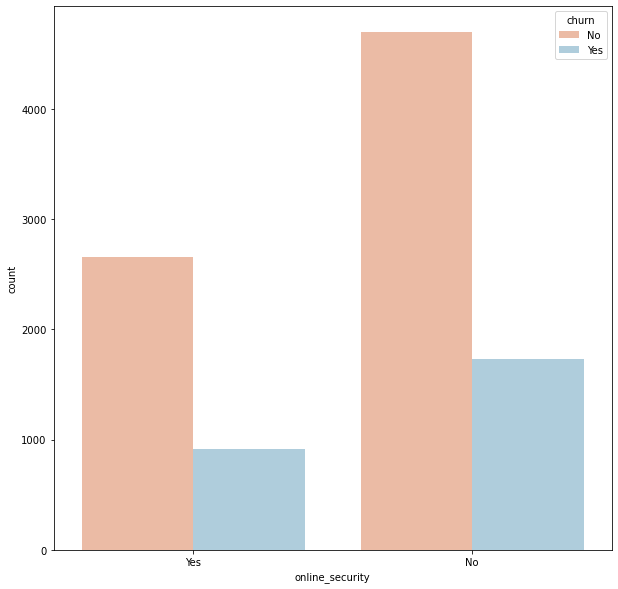

In [56]:
sns.countplot(x='online_security',hue='churn',data=prep_df,palette='RdBu');

In [57]:
prep_df['online_backup'].describe()

count     10000
unique        2
top          No
freq       5494
Name: online_backup, dtype: object

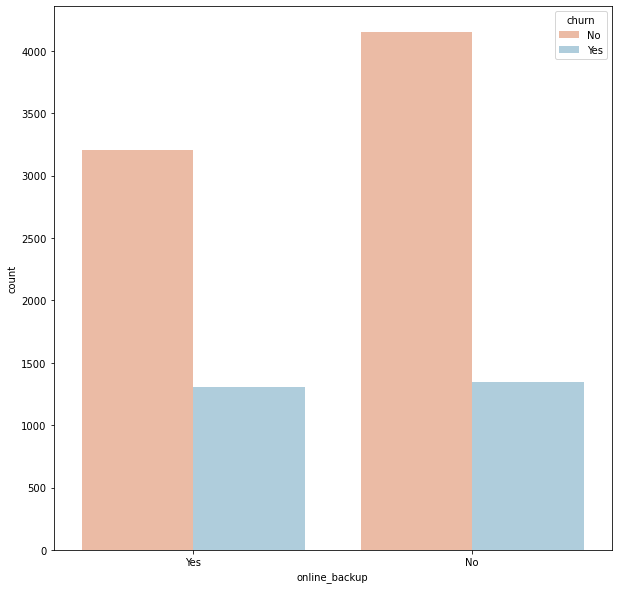

In [58]:
sns.countplot(x='online_backup',hue='churn',data=prep_df,palette='RdBu');

In [59]:
prep_df['device_protection'].describe()

count     10000
unique        2
top          No
freq       5614
Name: device_protection, dtype: object

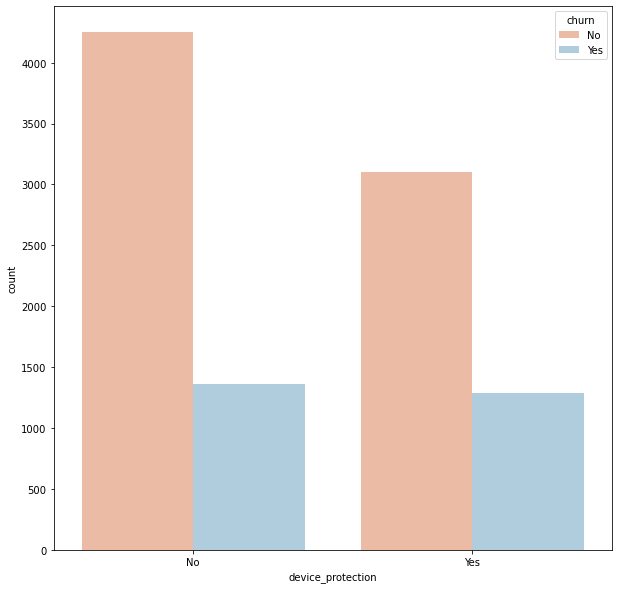

In [60]:
sns.countplot(x='device_protection', hue='churn',data=prep_df, palette='RdBu');

In [61]:
prep_df['tech_support'].describe()

count     10000
unique        2
top          No
freq       6250
Name: tech_support, dtype: object

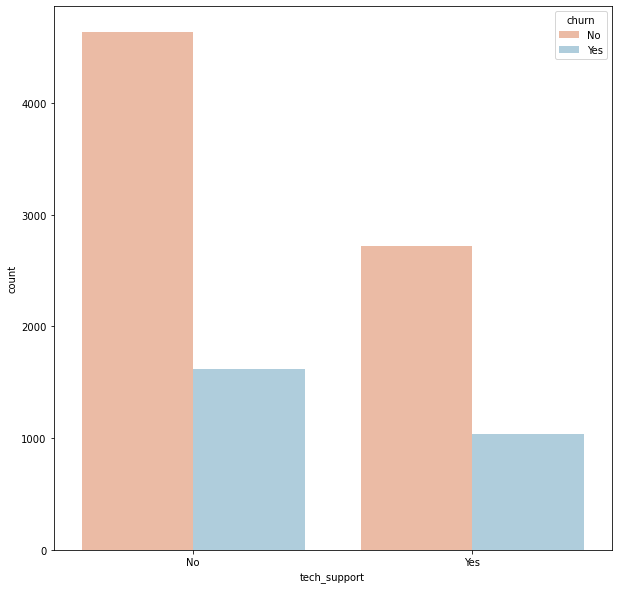

In [62]:
sns.countplot(x='tech_support', hue='churn', data=prep_df, palette='RdBu');

In [63]:
prep_df['streaming_tv'].describe()

count     10000
unique        2
top          No
freq       5071
Name: streaming_tv, dtype: object

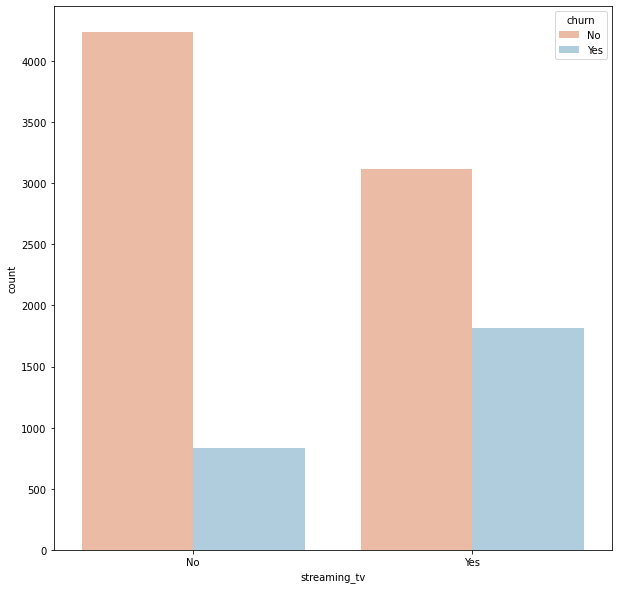

In [64]:
sns.countplot(x='streaming_tv', hue='churn', data=prep_df, palette='RdBu');

In [65]:
prep_df['streaming_movies'].describe()

count     10000
unique        2
top          No
freq       5110
Name: streaming_movies, dtype: object

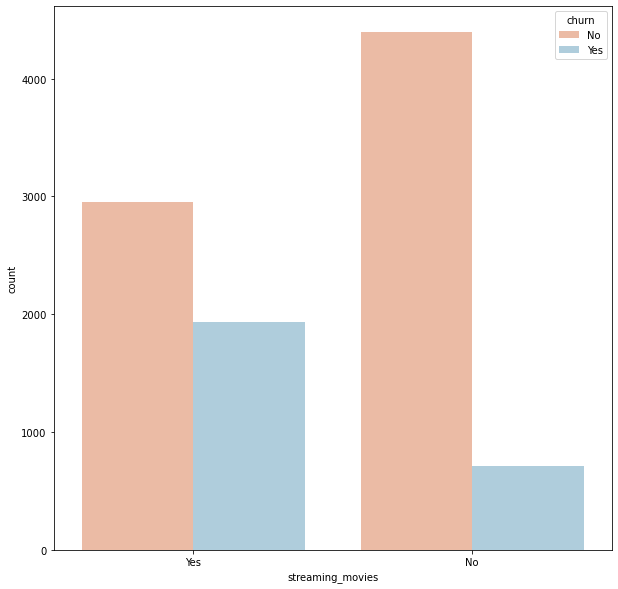

In [66]:
sns.countplot(x='streaming_movies',hue='churn', data=prep_df, palette='RdBu');

In [67]:
prep_df['bandwidth_gb'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: bandwidth_gb, dtype: float64

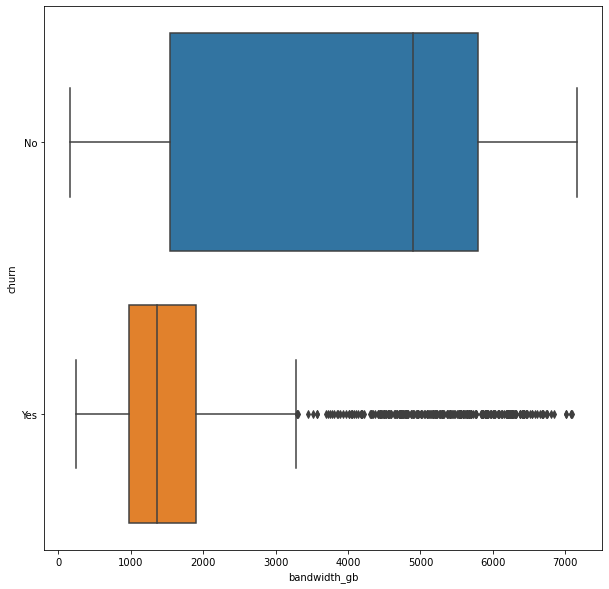

In [68]:
sns.boxplot(x='bandwidth_gb', y='churn', data=prep_df);

In [69]:
prep_df['paperless_billing'].describe()

count     10000
unique        2
top         Yes
freq       5882
Name: paperless_billing, dtype: object

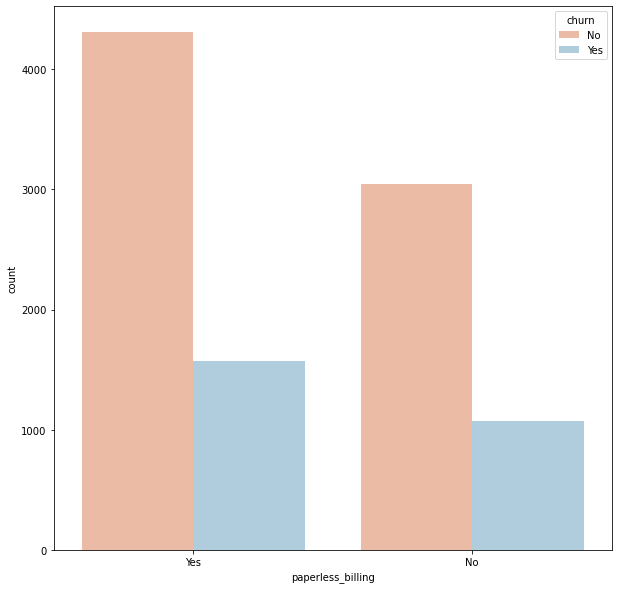

In [70]:
sns.countplot(x='paperless_billing',hue='churn',data=prep_df, palette='RdBu');

In [71]:
#scale and transform the features for analysis

In [72]:
prep_df['port_numeric'] = prep_df['port_modem']
dict_port_modem = {'port_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_port_modem, inplace=True)

In [73]:
prep_df['tablet_numeric'] = prep_df['tablet']
dict_tablet = {'tablet_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_tablet, inplace=True)

In [74]:
prep_df['phone_numeric'] = prep_df['phone_service']
dict_phone = {'phone_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_phone, inplace=True)

In [75]:
prep_df['multi_numeric'] = prep_df['multi_lines']
dict_multi_lines = {'multi_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_multi_lines, inplace=True)

In [76]:
prep_df['security_numeric'] = prep_df['online_security']
dict_security = {'security_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_security, inplace=True)

In [77]:
prep_df['backup_numeric'] = prep_df['online_backup']
dict_backup = {'backup_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_backup, inplace=True)

In [78]:
prep_df['protection_numeric'] = prep_df['device_protection']
dict_protection = {'protection_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_protection, inplace=True)

In [79]:
prep_df['support_numeric'] = prep_df['tech_support']
dict_support = {'support_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_support, inplace=True)

In [80]:
prep_df['tv_numeric'] = prep_df['streaming_tv']
dict_tv = {'tv_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_tv, inplace=True)

In [81]:
prep_df['movies_numeric'] = prep_df['streaming_movies']
dict_movies = {'movies_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_movies, inplace=True)

In [82]:
prep_df['paperless_numeric'] = prep_df['paperless_billing']
dict_paperless = {'paperless_numeric':{"Yes":1,"No":0}}
prep_df.replace(dict_paperless, inplace=True)

In [83]:
prep_df['churn_numeric'] = prep_df['churn']
dict_churn = {'churn_numeric': {"Yes":1, "No":0}}
prep_df.replace(dict_churn, inplace=True)

In [84]:
binary_cat_columns = prep_df[["port_numeric","tablet_numeric","phone_numeric",
                              "multi_numeric","security_numeric","backup_numeric","protection_numeric",
                              "support_numeric","tv_numeric","movies_numeric","paperless_numeric",
                             "churn_numeric"]]
b_cat_var_df = binary_cat_columns.copy()

In [85]:
b_cat_var_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   port_numeric        10000 non-null  int64
 1   tablet_numeric      10000 non-null  int64
 2   phone_numeric       10000 non-null  int64
 3   multi_numeric       10000 non-null  int64
 4   security_numeric    10000 non-null  int64
 5   backup_numeric      10000 non-null  int64
 6   protection_numeric  10000 non-null  int64
 7   support_numeric     10000 non-null  int64
 8   tv_numeric          10000 non-null  int64
 9   movies_numeric      10000 non-null  int64
 10  paperless_numeric   10000 non-null  int64
 11  churn_numeric       10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


In [86]:
continuous_columns = prep_df[["outage_sec_perweek","email_correspondence",
                               "support_contacts","equip_fail_year","monthly_charge","bandwidth_gb"]]
cont_num_df = continuous_columns.copy()

In [87]:
cont_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   outage_sec_perweek    10000 non-null  float64
 1   email_correspondence  10000 non-null  int64  
 2   support_contacts      10000 non-null  int64  
 3   equip_fail_year       10000 non-null  int64  
 4   monthly_charge        10000 non-null  float64
 5   bandwidth_gb          10000 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 468.9 KB


In [88]:
cont_num_df_scaled = cont_num_df
col_names = ['outage_sec_perweek','email_correspondence','support_contacts',
             'equip_fail_year','monthly_charge','bandwidth_gb']

features = cont_num_df_scaled[col_names]

scaler = MinMaxScaler()

cont_num_df_scaled[col_names] = scaler.fit_transform(features.values)
cont_num_df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
outage_sec_perweek,10000.0,0.469128,0.140994,0.0,0.375150,0.469919,0.562347,1.0
email_correspondence,10000.0,0.500727,0.137541,0.0,0.409091,0.500000,0.590909,1.0
support_contacts,10000.0,0.142029,0.141209,0.0,0.000000,0.142857,0.285714,1.0
equip_fail_year,10000.0,0.066333,0.105992,0.0,0.000000,0.000000,0.166667,1.0
monthly_charge,10000.0,0.440790,0.204314,0.0,0.285469,0.416335,0.574531,1.0
bandwidth_gb,10000.0,0.462176,0.312030,0.0,0.154347,0.446069,0.775420,1.0


In [89]:
categorical_columns = prep_df[["contract","internet_service","payment_method"]]
cat_var_df = categorical_columns.copy()

In [90]:
cat_var_df = pd.get_dummies(cat_var_df, columns=['contract','internet_service',
                                                 'payment_method'], drop_first=True)
cat_var_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   contract_One year                       10000 non-null  uint8
 1   contract_Two Year                       10000 non-null  uint8
 2   internet_service_Fiber Optic            10000 non-null  uint8
 3   internet_service_None                   10000 non-null  uint8
 4   payment_method_Credit Card (automatic)  10000 non-null  uint8
 5   payment_method_Electronic Check         10000 non-null  uint8
 6   payment_method_Mailed Check             10000 non-null  uint8
dtypes: uint8(7)
memory usage: 68.5 KB


In [91]:
cat_var_df = cat_var_df.rename(columns={'contract_One year':'contract_One_Year',
                                'contract_Two Year':'contract_Two_Year',
                                'internet_service_Fiber Optic': 'internet_service_Fiber_Optic',
                                'payment_method_Credit Card (automatic)': 'payment_method_Credit_Card_auto',
                                'payment_method_Electronic Check':'payment_method_Electronic_Check',
                                'payment_method_Mailed Check':'payment_method_Mailed_Check'})
cat_var_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   contract_One_Year                10000 non-null  uint8
 1   contract_Two_Year                10000 non-null  uint8
 2   internet_service_Fiber_Optic     10000 non-null  uint8
 3   internet_service_None            10000 non-null  uint8
 4   payment_method_Credit_Card_auto  10000 non-null  uint8
 5   payment_method_Electronic_Check  10000 non-null  uint8
 6   payment_method_Mailed_Check      10000 non-null  uint8
dtypes: uint8(7)
memory usage: 68.5 KB


In [92]:
new_prep_df = pd.concat([b_cat_var_df,cat_var_df], axis=1, ignore_index=False)
new_prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   port_numeric                     10000 non-null  int64
 1   tablet_numeric                   10000 non-null  int64
 2   phone_numeric                    10000 non-null  int64
 3   multi_numeric                    10000 non-null  int64
 4   security_numeric                 10000 non-null  int64
 5   backup_numeric                   10000 non-null  int64
 6   protection_numeric               10000 non-null  int64
 7   support_numeric                  10000 non-null  int64
 8   tv_numeric                       10000 non-null  int64
 9   movies_numeric                   10000 non-null  int64
 10  paperless_numeric                10000 non-null  int64
 11  churn_numeric                    10000 non-null  int64
 12  contract_One_Year                10000 non-null

In [93]:
new_prep_df = pd.concat([new_prep_df, cont_num_df_scaled], axis=1, ignore_index=False)
new_prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   port_numeric                     10000 non-null  int64  
 1   tablet_numeric                   10000 non-null  int64  
 2   phone_numeric                    10000 non-null  int64  
 3   multi_numeric                    10000 non-null  int64  
 4   security_numeric                 10000 non-null  int64  
 5   backup_numeric                   10000 non-null  int64  
 6   protection_numeric               10000 non-null  int64  
 7   support_numeric                  10000 non-null  int64  
 8   tv_numeric                       10000 non-null  int64  
 9   movies_numeric                   10000 non-null  int64  
 10  paperless_numeric                10000 non-null  int64  
 11  churn_numeric                    10000 non-null  int64  
 12  contract_One_Year  

In [94]:
knn_df = new_prep_df.copy()
knn_df.to_csv('/Users/katherinevoakes/Desktop/wgu/cleaned_knn_data.csv', index=False)

In [95]:
knn_df = pd.read_csv('/Users/katherinevoakes/Desktop/wgu/cleaned_knn_data.csv')
knn_df.head().T

,0,1,2,3,4
port_numeric,1.000000,0.000000,1.000000,0.000000,1.000000
tablet_numeric,1.000000,1.000000,0.000000,0.000000,0.000000
phone_numeric,1.000000,1.000000,1.000000,1.000000,0.000000
multi_numeric,0.000000,1.000000,1.000000,0.000000,0.000000
security_numeric,1.000000,1.000000,0.000000,1.000000,0.000000
backup_numeric,1.000000,0.000000,0.000000,0.000000,0.000000
protection_numeric,0.000000,0.000000,0.000000,0.000000,0.000000
support_numeric,0.000000,0.000000,0.000000,0.000000,1.000000
tv_numeric,0.000000,1.000000,0.000000,1.000000,1.000000
movies_numeric,1.000000,1.000000,1.000000,0.000000,0.000000


In [96]:
data = knn_df.drop(columns=['churn_numeric'], axis=1)
target = knn_df[['churn_numeric']]
mod_features = SelectKBest(score_func=chi2, k=15)
x = data
y = target
selection = mod_features.fit_transform(x,y)
 
print("After selecting best 15 features:", selection.shape)

After selecting best 15 features: (10000, 15)


In [97]:
filter = mod_features.get_support()
features = data.columns
 
print("All features:")
print(features)
print('-'*100)
print("Selected best 15:")
print(features[filter])
print(selection) 

All features:
Index(['port_numeric', 'tablet_numeric', 'phone_numeric', 'multi_numeric',
       'security_numeric', 'backup_numeric', 'protection_numeric',
       'support_numeric', 'tv_numeric', 'movies_numeric', 'paperless_numeric',
       'contract_One_Year', 'contract_Two_Year',
       'internet_service_Fiber_Optic', 'internet_service_None',
       'payment_method_Credit_Card_auto', 'payment_method_Electronic_Check',
       'payment_method_Mailed_Check', 'outage_sec_perweek',
       'email_correspondence', 'support_contacts', 'equip_fail_year',
       'monthly_charge', 'bandwidth_gb'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Selected best 15:
Index(['multi_numeric', 'security_numeric', 'backup_numeric',
       'protection_numeric', 'support_numeric', 'tv_numeric', 'movies_numeric',
       'contract_One_Year', 'contract_Two_Year',
       'internet_service_Fiber_Optic', 'internet_service_None',
       

In [98]:
X = knn_df.drop(['churn_numeric','port_numeric','tablet_numeric','phone_numeric','paperless_numeric',
                'payment_method_Credit_Card_auto','outage_sec_perweek','email_correspondence',
                'support_contacts','equip_fail_year'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   multi_numeric                    10000 non-null  int64  
 1   security_numeric                 10000 non-null  int64  
 2   backup_numeric                   10000 non-null  int64  
 3   protection_numeric               10000 non-null  int64  
 4   support_numeric                  10000 non-null  int64  
 5   tv_numeric                       10000 non-null  int64  
 6   movies_numeric                   10000 non-null  int64  
 7   contract_One_Year                10000 non-null  int64  
 8   contract_Two_Year                10000 non-null  int64  
 9   internet_service_Fiber_Optic     10000 non-null  int64  
 10  internet_service_None            10000 non-null  int64  
 11  payment_method_Electronic_Check  10000 non-null  int64  
 12  payment_method_Mail

In [99]:
y= knn_df[['churn_numeric']]
y.head().T

,0,1,2,3,4
churn_numeric,0,1,0,0,1


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [101]:
X_train_df = X_train.copy()
X_train_df.to_csv('/Users/katherinevoakes/Desktop/wgu/x_train_data.csv', index=False)

In [102]:
X_test_df = X_test.copy()
X_test_df.to_csv('/Users/katherinevoakes/Desktop/wgu/x_test_data.csv', index=False)

In [103]:
y_train_df = y_train.copy()
y_train_df.to_csv('/Users/katherinevoakes/Desktop/wgu/y_train_data.csv', index=False)

In [104]:
y_test_df = y_test.copy()
y_test_df.to_csv('/Users/katherinevoakes/Desktop/wgu/y_test_data.csv', index=False)

In [105]:
X_train = pd.read_csv('/Users/katherinevoakes/Desktop/wgu/x_train_data.csv')
y_train = pd.read_csv('/Users/katherinevoakes/Desktop/wgu/y_train_data.csv')
X_test = pd.read_csv('/Users/katherinevoakes/Desktop/wgu/x_test_data.csv')
y_test = pd.read_csv('/Users/katherinevoakes/Desktop/wgu/y_test_data.csv')

In [106]:
y_test = np.ravel(y_test)
print(y_test.shape)
y_train = np.ravel(y_train)
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)

(2000,)
(8000,)
(8000, 15)
(2000, 15)


##### "A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(). return self._fit(X, y)"
##### This warning showed up and was fixed with the numpy.ravel() method. 

In [107]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

prediction = knn.predict(X_test)

test_accuracy = knn.score(X_test, y_test)
print('Test set predictions:')
print(prediction)
print('Testing Accuracy Score:',(test_accuracy))

Test set predictions:
[0 0 1 ... 1 0 0]
Testing Accuracy Score: 0.8135


In [108]:
steps = [('scaler', MinMaxScaler()),('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors': np.arange(1, 15)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

In [109]:
cross_val = GridSearchCV(pipeline, param_grid=parameters)
knn2 = cross_val.fit(X_train, y_train)
train_accuracy = knn2.score(X_train, y_train)
new_predict = knn2.predict(X_test)
test_accuracy = knn2.score(X_test, y_test)


print(knn2.best_params_)
print(knn2.score(X_test, y_test))
print(train_accuracy)
print(test_accuracy)

{'knn__n_neighbors': 13}
0.8555
0.8775
0.8555


In [110]:
print(classification_report(y_test, new_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1442
           1       0.82      0.61      0.70       558

    accuracy                           0.86      2000
   macro avg       0.84      0.78      0.80      2000
weighted avg       0.85      0.86      0.85      2000



In [111]:
print(roc_auc_score(y_test, new_predict))

0.7816888630386908
